Background and motivations:

Pancreatic cancer is ranked among the most deadliest cancers due to its low 5-year-survival rate and difficulty in successful diagnosis in its early stages in lack of direct characteristic biomarkers. However, methods based on machine learning provide potential means to identify pancreatic cancer using urinary biomarkers. The objective of this capstone project aims to compare multiple classifier models and determine an optimal model to predict whether patients with unseen urinary biomarkers have pancreatic cancer. Being able to correctly detect pancreatic cancer in early stage promises a new approach in clinical diagnosis, which will certainly assist doctors to  produce more accurate results.

The dataset used in this project is provided by Crnogorac-Jurcevic et al. in their publication "A combination of urinary biomarker panel and PancRISK score for earlier detection of pancreatic cancer: A case–control study" [1] The target variable to be classified is "diagnosis" column, with expected values of 1 (healthy), 2 (benign hepatobiliary disease) and 3(pancreatic cancer). Feature variables are chosen to be urinary biomarkers, i.e. plasma_CA19_9, creatinine, LYVE1, REG1B, TFF1, REG1A and patients' age and sex. The rest of the columns, for instance, sample_origin (hospitals at which tests were performed) and stage (pancreatic cancer stage if tested positive) are considered irrelavent to the interest of this project and are therefore disregarded.

Since the target variable (diagnosis) takes on 3 possible values, four multi classifier models covered in Supervised Learning Module will be performed in parallel for peer comparison and they are: logistic regression, random forest , K-nearest neighbor and SVM. 




Disclaimer: Machine learning models with identical objective are trained by the authors from which the aforementioned dataset is taken (see reference), but the following works by Linmin Wang, the student, are by no mean a reconstruction of their prior works. In fact, the models and clinical interpretations of variables elaborated in this paper lay far beyond the student's comprehension and only the dataset was taken from this publication.


Reference:
[1] A combination of urinary biomarker panel and PancRISK score for earlier detection of pancreatic cancer: A case–control study Debernardi S, O’Brien H, Algahmdi AS, Malats N, Stewart GD, et al. (2020) A combination of urinary biomarker panel and PancRISK score for earlier detection of pancreatic cancer: A case–control study. PLOS Medicine 17(12): e1003489. https://doi.org/10.1371/journal.pmed.1003489




In [1]:
# Import
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler

1. Initial data exploration and data preparation

In [2]:
# Import data and data types
df = pd.read_csv('C://Users//Linmin//Downloads//Debernardi et al 2020 data.csv')
df = df.drop(columns=['sample_id','patient_cohort','sample_origin','stage','benign_sample_diagnosis'])
print(df.shape)
print(df.info())

# Change sex to is_male, i.e. 1 means male
df['is_male'] = pd.get_dummies(df["sex"], drop_first=True)
df = df.drop(columns=['sex'])


(590, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            590 non-null    int64  
 1   sex            590 non-null    object 
 2   diagnosis      590 non-null    int64  
 3   plasma_CA19_9  350 non-null    float64
 4   creatinine     590 non-null    float64
 5   LYVE1          590 non-null    float64
 6   REG1B          590 non-null    float64
 7   TFF1           590 non-null    float64
 8   REG1A          306 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 41.6+ KB
None


In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

df.head(20)


,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,is_male
0,33,1,11.7,1.83222,0.893219,52.94884,654.282174,1262.000,0
1,81,1,NaN,0.97266,2.037585,94.46703,209.488250,228.407,0
2,51,1,7.0,0.78039,0.145589,102.36600,461.141000,NaN,1
3,61,1,8.0,0.70122,0.002805,60.57900,142.950000,NaN,1
4,62,1,9.0,0.21489,0.000860,65.54000,41.088000,NaN,1
5,53,1,NaN,0.84825,0.003393,62.12600,59.793000,NaN,1
6,70,1,NaN,0.62205,0.174381,152.27700,117.516000,NaN,1
7,58,1,11.0,0.89349,0.003574,3.73000,40.294000,NaN,0
8,59,1,NaN,0.48633,0.001945,7.02100,26.782000,NaN,0
9,56,1,24.0,0.61074,0.278778,83.92800,19.185000,NaN,0


In [4]:
# Reorganize the dataframe, swap the is_male column with plasma_CA19_9 column, and sort the rows by age, diagnosis and is_male

headers = list(df.columns)
headers[2],headers[-1] = headers[-1],headers[2]
df = df.reindex(columns=headers)
df = df.sort_values(by=['age','diagnosis','is_male']).reset_index(drop=True)
df.head(20)

,age,diagnosis,is_male,creatinine,LYVE1,REG1B,TFF1,REG1A,plasma_CA19_9
0,26,1,0,0.19227,0.000906,13.027030,0.906008,NaN,3.527344
1,26,2,0,0.23751,0.000950,3.680000,50.945000,NaN,26.000000
2,28,1,0,0.50895,0.583010,13.619060,267.193539,381.000,8.700000
3,28,1,0,0.32799,0.001312,7.520023,19.210785,0.000,84.300000
4,28,2,0,0.44109,0.001764,10.888000,18.613000,NaN,5.000000
5,29,2,0,0.12441,0.000498,0.201000,11.541000,NaN,NaN
6,29,2,0,1.13100,3.565135,240.235000,671.283000,NaN,25.000000
7,29,2,1,0.46371,4.027098,34.053828,308.702405,774.000,32.300000
8,29,2,1,0.21489,3.719767,12.739000,122.842000,NaN,13.000000
9,29,3,1,2.80488,5.137218,918.738030,2207.570000,1926.084,468.300000


In [4]:
# Count the nulls 
null_count = df.isnull().sum()
null_count/len(df)


age              0.000000
diagnosis        0.000000
is_male          0.000000
creatinine       0.000000
LYVE1            0.000000
REG1B            0.000000
TFF1             0.000000
REG1A            0.481356
plasma_CA19_9    0.406780
dtype: float64

Seeing that a significant portion of 'REG1A' and 'plasma_CA19_9' is missing values, 48.1% and 40.6%, respectively, a method must be adopted to fill in the missing values. The strategy here is to find patients with identical gender, diagnosis result and closest age. If multiple instances matching the above conditions are found, the average of either REG1A and plasma_CA19_9 will be used to fill in the corresponding missing cells. 

In [5]:
# Filling the missing values:
import math
for i in range(len(df)):
    
    if math.isnan(df.at[i,'REG1A']) or df.at[i,'REG1A'] == 0.000:  # When REG1A is NaN or 0.000, then extract the patient's age, gender and diagnosis
        # Note: I noticed one or two instances with REG1A = 0.000, and I considered them outliers since the rest is generally >> 100
        age = df.at[i,'age']
        is_male = df.at[i,'is_male']
        diagnosis = df.at[i,'diagnosis']
        
        # Select a subset from the original dataframe with matching gender, diagnosis result and a valid REG1A value
        subset = df[(df['is_male'] == is_male)&(df['diagnosis'] == diagnosis)&(df['REG1A'].isnull() == False)&(df['REG1A']!=0.0)]
        # Further refine the subset with the closest age
        subset = subset[(subset['age']-age).abs() == (subset['age']-age).abs().min()]
        # Modify the missing cell values to the average of the above subset
        df.at[i,'REG1A'] = subset['REG1A'].mean()
    
    if math.isnan(df.at[i,'plasma_CA19_9']):
        age = df.at[i,'age']
        is_male = df.at[i,'is_male']
        diagnosis = df.at[i,'diagnosis']
        subset = df[(df['is_male'] == is_male)&(df['diagnosis'] == diagnosis)&(df['plasma_CA19_9'].isnull() == False)]
        subset = subset[(subset['age']-age).abs() == (subset['age']-age).abs().min()]
        df.at[i,'plasma_CA19_9'] = subset['plasma_CA19_9'].mean()
        

df.head(20)


,age,diagnosis,is_male,creatinine,LYVE1,REG1B,TFF1,REG1A,plasma_CA19_9
0,26,1,0,0.19227,0.000906,13.027030,0.906008,381.000,3.527344
1,26,2,0,0.23751,0.000950,3.680000,50.945000,205.648,26.000000
2,28,1,0,0.50895,0.583010,13.619060,267.193539,381.000,8.700000
3,28,1,0,0.32799,0.001312,7.520023,19.210785,381.000,84.300000
4,28,2,0,0.44109,0.001764,10.888000,18.613000,205.648,5.000000
5,29,2,0,0.12441,0.000498,0.201000,11.541000,205.648,25.000000
6,29,2,0,1.13100,3.565135,240.235000,671.283000,205.648,25.000000
7,29,2,1,0.46371,4.027098,34.053828,308.702405,774.000,32.300000
8,29,2,1,0.21489,3.719767,12.739000,122.842000,774.000,13.000000
9,29,3,1,2.80488,5.137218,918.738030,2207.570000,1926.084,468.300000


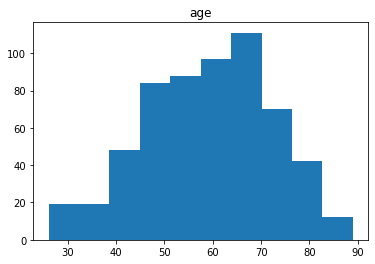

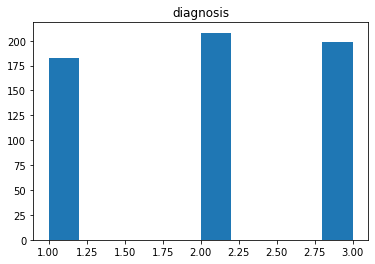

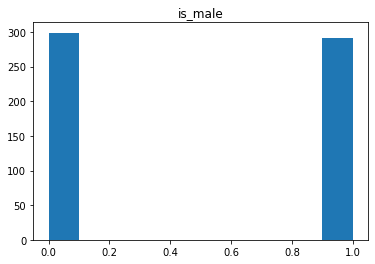

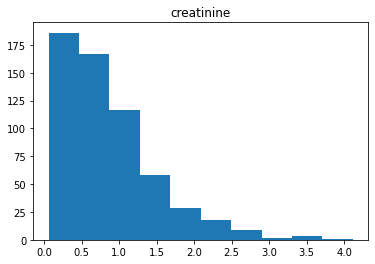

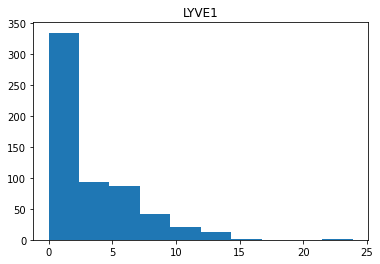

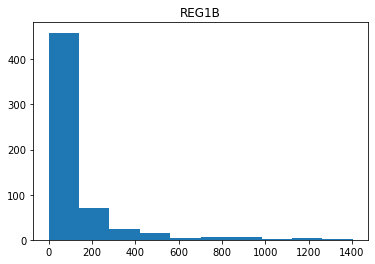

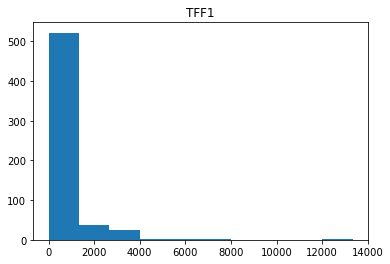

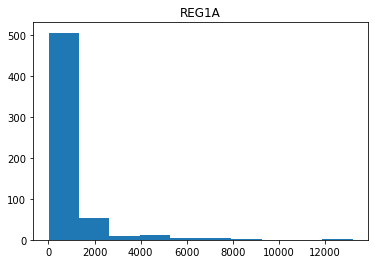

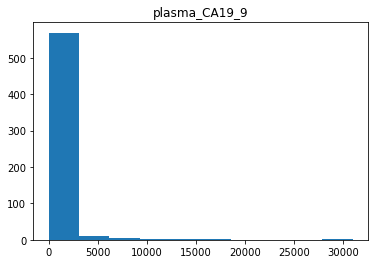

In [270]:
# Histograms of feature and target variables
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

Comment:Upon visual examination, the age distribution roughly follows a normal distribution centered around 60 years old. The 6 urinary biomarkers visually resemble the right half of a normal distribution (some with sharp peaks around 0). Diagnosis and sex are well-balanced with roughly equal ammounts to each category.

In [6]:
#Reorganize the column titles, moving diagnosis to the far right 
cols = ['age', 'is_male', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A', 'plasma_CA19_9','diagnosis']
print(cols)
df=df[cols]
print(df)

['age', 'is_male', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A', 'plasma_CA19_9', 'diagnosis']
     age  is_male  creatinine      LYVE1       REG1B         TFF1      REG1A  \
0     26        0     0.19227   0.000906   13.027030     0.906008   381.0000   
1     26        0     0.23751   0.000950    3.680000    50.945000   205.6480   
2     28        0     0.50895   0.583010   13.619060   267.193539   381.0000   
3     28        0     0.32799   0.001312    7.520023    19.210785   381.0000   
4     28        0     0.44109   0.001764   10.888000    18.613000   205.6480   
..   ...      ...         ...        ...         ...          ...        ...   
585   87        0     0.87087   1.464090   11.756486   263.700200   108.2980   
586   87        1     0.06786   0.000271    0.730367     0.005293    92.7270   
587   87        1     0.71253  10.135810  370.105400  3351.345000   466.8755   
588   88        0     1.09707  10.273040  113.094000  1256.712000  1453.2720   
589   89        0     

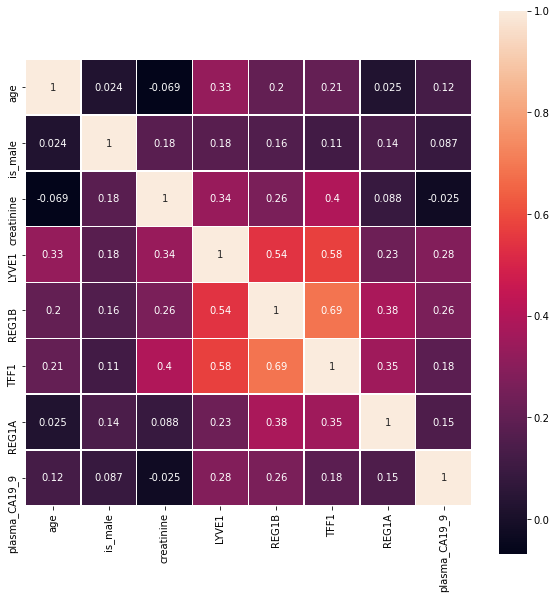

In [62]:
# Plot a heat map for the correlation matrix
import seaborn as sns




corrmat = df.drop(columns=['diagnosis']).corr()

plt.figure(figsize=(10,10))
sns.heatmap(corrmat,square=True,annot=True,linewidth=.5)
plt.savefig('C://Users//Linmin//Desktop//heat_map.png')
plt.show()


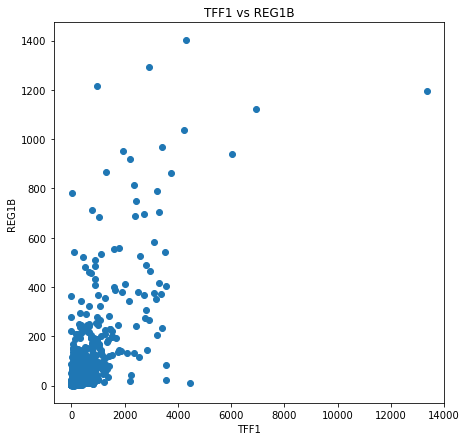

In [18]:
plt.figure(figsize=(7,7))


plt.scatter(df["TFF1"], df["REG1B"])
plt.title("TFF1 vs REG1B")
plt.xlabel("TFF1")
plt.ylabel("REG1B")
plt.show()


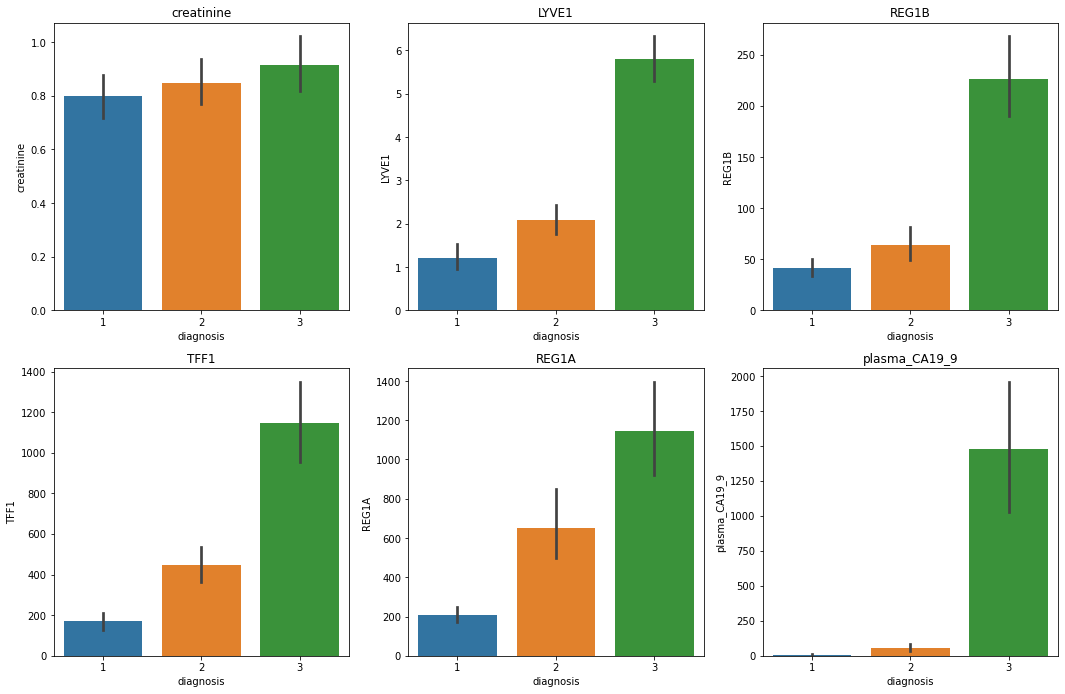

In [60]:
plt.figure(figsize=(18,18))


plt.subplot(3,3,1)
sns.barplot(df["diagnosis"], df["creatinine"])
plt.title("creatinine")

plt.subplot(3,3,2)
sns.barplot(df["diagnosis"], df["LYVE1"])
plt.title("LYVE1")

plt.subplot(3,3,3)
sns.barplot(df["diagnosis"], df["REG1B"])
plt.title("REG1B")

plt.subplot(3,3,4)
sns.barplot(df["diagnosis"], df["TFF1"])
plt.title("TFF1")

plt.subplot(3,3,5)
sns.barplot(df["diagnosis"], df["REG1A"])
plt.title("REG1A")

plt.subplot(3,3,6)
sns.barplot(df["diagnosis"], df["plasma_CA19_9"])
plt.title("plasma_CA19_9")
plt.savefig('C://Users//Linmin//Desktop//bar_plots.png')
plt.show()



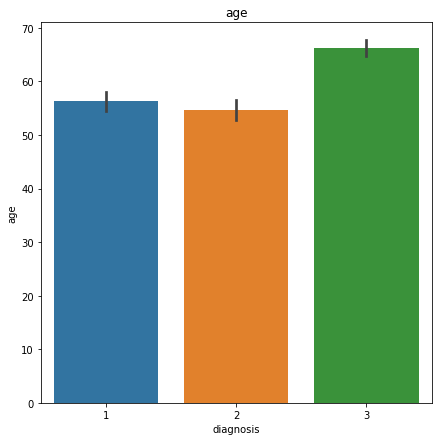

In [30]:
plt.figure(figsize=(7,7))

sns.barplot(df["diagnosis"], df["age"])
plt.title("age")
plt.show()

In [457]:
# Assign training set and test set, the test set will be 1/5 of the total samples

from sklearn.model_selection import train_test_split

X = df.drop(['diagnosis'],axis = 1)
y = df['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print('X train set shape: ', X_train.shape)
print('Y train set shape: ', y_train.shape)
print('X test set shape: ', X_test.shape)
print('Y test set shape: ', y_test.shape)


X train set shape:  (472, 8)
Y train set shape:  (472,)
X test set shape:  (118, 8)
Y test set shape:  (118,)


In [300]:
# Define a confusion matrix plotting function. The function was provided by Thinkful guided examples.
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


2. Logistic Regression



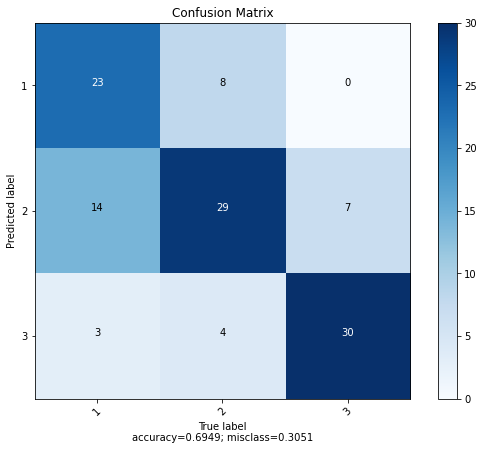

              precision    recall  f1-score   support

           1       0.74      0.57      0.65        40
           2       0.58      0.71      0.64        41
           3       0.81      0.81      0.81        37

    accuracy                           0.69       118
   macro avg       0.71      0.70      0.70       118
weighted avg       0.71      0.69      0.70       118



In [278]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import  classification_report, confusion_matrix

LR = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=10000,penalty='none')
LR.fit(X_train,y_train)
y_predict_LR = LR.predict(X_test)

CM_LR = confusion_matrix(y_test, y_predict_LR)
plot_confusion_matrix(cm=CM_LR, target_names=[1,2,3], title = 'Confusion Matrix',normalize=False)

print(classification_report(y_predict_LR,y_test))

In [492]:
# Cross-validation and comparison for two types of Logistic Regression: OvR and multi-nomial
LR_cv = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000)
LR_cv_scores = cross_val_score(LR_cv, X, y, cv=5)
print('Accuracy scores for the 5 folds OvR LR: ', LR_cv_scores)
print('Mean cross validation score OvR LR: {:.3f}'.format(np.mean(LR_cv_scores)))
print('Std cross validation score OvR LR: {:.3f}'.format(np.std(LR_cv_scores)))

LR_cv_multi = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=10000)
LR_cv_scores = cross_val_score(LR_cv_multi, X, y, cv=5)
print('Accuracy scores for the 5 folds multinominal LR: ', LR_cv_scores)
print('Mean cross validation score multinominal LR: {:.3f}'.format(np.mean(LR_cv_scores)))
print('Std cross validation score multinominal LR: {:.3f}'.format(np.std(LR_cv_scores)))




Accuracy scores for the 5 folds OvR LR:  [0.57627119 0.80508475 0.74576271 0.65254237 0.6440678 ]
Mean cross validation score OvR LR: 0.685
Std cross validation score OvR LR: 0.081
Accuracy scores for the 5 folds multinominal LR:  [0.57627119 0.76271186 0.76271186 0.68644068 0.6779661 ]
Mean cross validation score multinominal LR: 0.693
Std cross validation score multinominal LR: 0.069


3. Random Forest

In [481]:
# Tuning the random forest model with number of trees generated (i), criterion (j) and max features included (k)
from sklearn.ensemble import RandomForestClassifier
max_mean = 0.0
min_std = 100.0
for i in np.linspace(10,100,10):
    for j in ['entropy','gini']:
        for k in np.linspace(1,8,8):
            RF_cv = RandomForestClassifier(n_estimators=int(i),random_state=1,criterion=j,max_features=int(k))
            RF_cv_scores = cross_val_score(RF_cv, X, y, cv=5)
            if np.mean(RF_cv_scores) >= max_mean:
                max_condition = [i,j,k]
                max_mean = np.mean(RF_cv_scores)
            if np.std(RF_cv_scores) <= min_std:
                min_std_condition = [i,j,k]
                min_std = np.std(RF_cv_scores)
            
            
    
print(max_condition)
print(max_mean)
print(min_std_condition)
print(min_std)


[50.0, 'entropy', 3.0]
0.6898305084745762
[10.0, 'entropy', 4.0]
0.045981898190679805


Searching through hyperparameter space leads to the following conditions to be chosen: 50 trees generated via entropy criterion with 3 features considered per tree. 

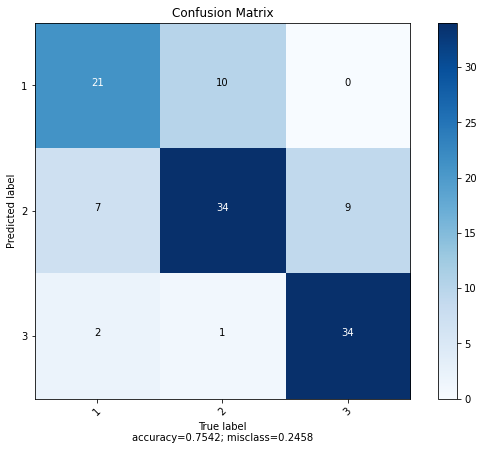

              precision    recall  f1-score   support

           1       0.68      0.70      0.69        30
           2       0.68      0.76      0.72        45
           3       0.92      0.79      0.85        43

    accuracy                           0.75       118
   macro avg       0.76      0.75      0.75       118
weighted avg       0.77      0.75      0.76       118



In [490]:
RF = RandomForestClassifier(n_estimators=50,criterion = 'entropy',max_features = 3,random_state=3)
RF.fit(X_train,y_train)
y_predict_RF = RF.predict(X_test)
CM_RF = confusion_matrix(y_test, y_predict_RF)
plot_confusion_matrix(cm=CM_RF, target_names=[1,2,3], title = 'Confusion Matrix',normalize=False)

print(classification_report(y_predict_RF,y_test))

In [489]:
# Cross-validation
RF_cv = RandomForestClassifier(n_estimators=50,random_state=1,criterion='entropy',max_features=3)
RF_cv_scores = cross_val_score(RF_cv, X, y, cv=5)
print('Accuracy scores for the 5 folds RF: ', RF_cv_scores)
print('Mean cross validation score RF: {:.3f}'.format(np.mean(RF_cv_scores)))
print('Std cross validation score RF: {:.3f}'.format(np.std(RF_cv_scores)))

Accuracy scores for the 5 folds RF:  [0.56779661 0.77966102 0.69491525 0.70338983 0.70338983]
Mean cross validation score RF: 0.690
Std cross validation score RF: 0.068


4. SVM

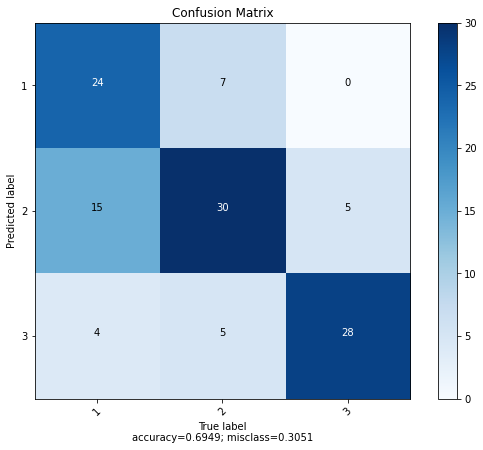

              precision    recall  f1-score   support

           1       0.77      0.56      0.65        43
           2       0.60      0.71      0.65        42
           3       0.76      0.85      0.80        33

    accuracy                           0.69       118
   macro avg       0.71      0.71      0.70       118
weighted avg       0.71      0.69      0.69       118



In [508]:
from sklearn.svm import SVC

# Instantiate the model and fit the data

SVM = SVC(kernel = 'linear')
SVM.fit(X_train, y_train)
y_predict_SVM = SVM.predict(X_test)

CM_SVM = confusion_matrix(y_test, y_predict_SVM)
plot_confusion_matrix(cm=CM_SVM, target_names=[1,2,3], title = 'Confusion Matrix',normalize=False)

print(classification_report(y_predict_SVM,y_test))

In [396]:
# Cross-validation
SVM_cv = SVC(kernel = 'linear')
SVM_cv_scores = cross_val_score(SVM_cv, X, y, cv=5)
print('Accuracy scores for the 5 folds SVM: ', SVM_cv_scores)
print('Mean cross validation score SVM: {:.3f}'.format(np.mean(SVM_cv_scores)))

Accuracy scores for the 5 folds SVM:  [0.56779661 0.77966102 0.73728814 0.70338983 0.72033898]
Mean cross validation score SVM: 0.702


5. k-Nearest Neighbors

In [448]:
# Tuning: 12 values of nearest neighbors are tested, aiming to find the highest cross validation scores

from sklearn.neighbors import KNeighborsClassifier

print('        Mean   Std')
for j in np.linspace(1,12,12):
    KNN_cv = KNeighborsClassifier(n_neighbors=int(j),n_jobs=-1)
    KNN_cv_scores = cross_val_score(KNN_cv, X, y, cv=5)
    
    print('NN = '+str(j),round(np.mean(KNN_cv_scores),3),round(np.std(KNN_cv_scores),3),KNN_cv_scores)

        Mean   Std
NN = 1 0.595 0.034 [0.54237288 0.56779661 0.61016949 0.62711864 0.62711864]
NN = 2 0.585 0.039 [0.52542373 0.56779661 0.57627119 0.62711864 0.62711864]
NN = 3 0.625 0.049 [0.53389831 0.63559322 0.6779661  0.62711864 0.65254237]
NN = 4 0.608 0.078 [0.47457627 0.57627119 0.66949153 0.62711864 0.69491525]
NN = 5 0.612 0.055 [0.51694915 0.60169492 0.66949153 0.61016949 0.66101695]
NN = 6 0.602 0.078 [0.47457627 0.58474576 0.6440678  0.59322034 0.71186441]
NN = 7 0.615 0.064 [0.50847458 0.62711864 0.66949153 0.58474576 0.68644068]
NN = 8 0.622 0.074 [0.48305085 0.63559322 0.69491525 0.62711864 0.66949153]
NN = 9 0.612 0.065 [0.49152542 0.61016949 0.6440678  0.62711864 0.68644068]
NN = 10 0.627 0.069 [0.50847458 0.63559322 0.65254237 0.61864407 0.72033898]
NN = 11 0.622 0.044 [0.55932203 0.60169492 0.63559322 0.61864407 0.69491525]
NN = 12 0.619 0.063 [0.5        0.63559322 0.6440678  0.62711864 0.68644068]


Though NN = 10 produces the highest mean score at 0.627, NN = 3 is selected as it has second highest average score while providing much lower standard deviation in the five cross validations. Also, having a lower nearest neighbors helps with distinguishing subtle boundaries between diagnosis outcomes. 

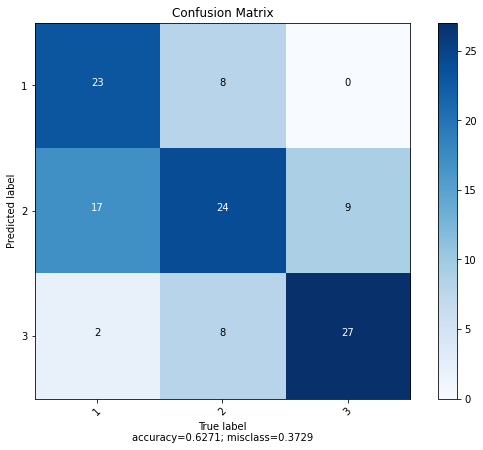

              precision    recall  f1-score   support

           1       0.74      0.55      0.63        42
           2       0.48      0.60      0.53        40
           3       0.73      0.75      0.74        36

    accuracy                           0.63       118
   macro avg       0.65      0.63      0.63       118
weighted avg       0.65      0.63      0.63       118



In [445]:
# Instantiate the model and fit the data

KNN = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
KNN.fit(X_train, y_train)
y_predict_KNN = KNN.predict(X_test)
CM_KNN = confusion_matrix(y_test, y_predict_KNN)
plot_confusion_matrix(cm=CM_KNN, target_names=[1,2,3], title = 'Confusion Matrix',normalize=False)

print(classification_report(y_predict_KNN,y_test))


In [491]:
KNN_cv = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
KNN_cv_scores = cross_val_score(KNN_cv, X, y, cv=5)


print('Accuracy scores for the 5 folds KNN: ', KNN_cv_scores)
print('Mean cross validation score KNN: {:.3f}'.format(np.mean(KNN_cv_scores)))
print('Std cross validation score KNN: {:.3f}'.format(np.std(KNN_cv_scores)))

Accuracy scores for the 5 folds KNN:  [0.53389831 0.63559322 0.6779661  0.62711864 0.65254237]
Mean cross validation score KNN: 0.625
Std cross validation score KNN: 0.049


6. Dummy Classifier

In [509]:
from sklearn.dummy import DummyClassifier

# "Train" a dummy model using the most frequent diagnosis outcome, the resulting accuracy is the one we need to beat
Dummy = DummyClassifier(strategy="most_frequent")
Dummy.fit(X_train, y_train)
y_predict_Dummy = Dummy.predict(X_test)

Dummy_cv_scores = cross_val_score(Dummy, X, y, cv=5)

print(classification_report(y_predict_Dummy,y_test))

print('Accuracy scores for the 5 folds Dummy Model: ', Dummy_cv_scores)
print('Mean cross validation score Dummy: {:.3f}'.format(np.mean(Dummy_cv_scores)))
print('Std cross validation score Dummy: {:.3f}'.format(np.std(Dummy_cv_scores)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.31      0.48       118

    accuracy                           0.31       118
   macro avg       0.33      0.10      0.16       118
weighted avg       1.00      0.31      0.48       118

Accuracy scores for the 5 folds Dummy Model:  [0.3559322  0.34745763 0.34745763 0.3559322  0.3559322 ]
Mean cross validation score Dummy: 0.353
Std cross validation score Dummy: 0.004


C:\Users\Linmin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7. Summary and Conclusion:

                        Mean Score   Std-dev  Recall (Cancer Case)
Logistic Regression       0.693220  0.068722                  0.81
Random Forest             0.689831  0.068345                  0.79
Support Vector Machine    0.701695  0.071589                  0.85
K-Nearest Neighbour       0.625424  0.048948                  0.75
Dummy Model               0.352542  0.004152                  0.31


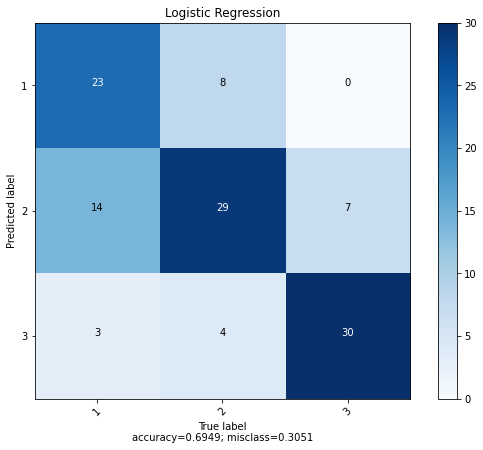

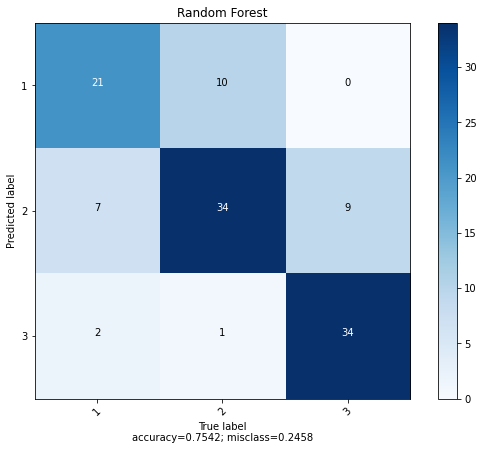

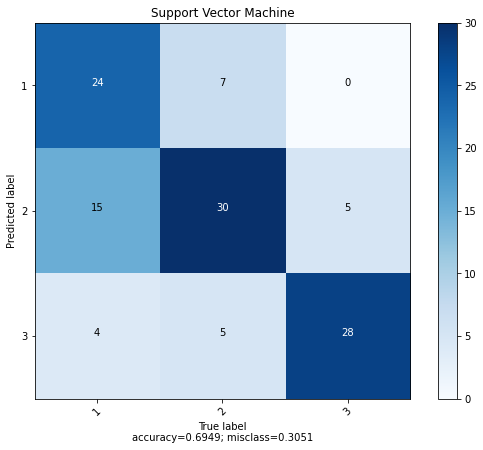

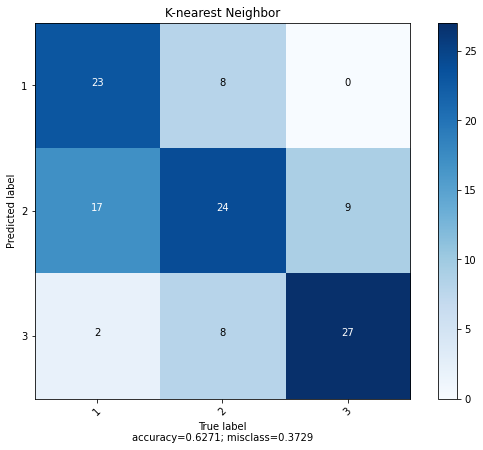

In [517]:
testscores = pd.DataFrame(data={'Mean Score':[np.mean(LR_cv_scores), np.mean(RF_cv_scores),np.mean(SVM_cv_scores),np.mean(KNN_cv_scores), np.mean(Dummy_cv_scores)],
                               'Std-dev' :[np.std(LR_cv_scores), np.std(RF_cv_scores),np.std(SVM_cv_scores),np.std(KNN_cv_scores), np.std(Dummy_cv_scores)],
                               'Recall (Cancer Case)':[0.81,0.79,0.85,0.75,0.31]
                               },
                       
                        index=['Logistic Regression',  'Random Forest','Support Vector Machine', 'K-Nearest Neighbour','Dummy Model']) 
print(testscores)

plot_confusion_matrix(cm=CM_LR, target_names=[1,2,3], title = 'Logistic Regression',normalize=False)
plot_confusion_matrix(cm=CM_RF, target_names=[1,2,3], title = 'Random Forest',normalize=False)
plot_confusion_matrix(cm=CM_SVM, target_names=[1,2,3], title = 'Support Vector Machine',normalize=False)
plot_confusion_matrix(cm=CM_KNN, target_names=[1,2,3], title = 'K-nearest Neighbor',normalize=False)

After fine-tuning each individual models by searching in the hyperparameter space, support vector machine produces the highest mean accuracy among its counterparts even though the standard deviation of a 5-fold cross validation is also the highest amoung all (0.072), but not too much higher than logistic regression(0.069) and random forest(0.068). KNN and the dummy model show low standard deviation in cross validation, meaning a consistent performance over unseen data, but their relatively low accuracies suggest a poor but consistent performance. All models outperform the dummy model by a huge margin in terms of the mean accuracy and recall, nonetheless. Notebly, the other important parameter for pancreatic cancer detection - recall for pancreatic cancer - also remains the highest for SVM, suggesting that 85% of patients with pancreatic cancer will be successfully detected by this algorithm.

The confusion matrix for each model showcases one instance from each cross validation, meaning that the best results may differ from an average score of a 5-fold cross validation. Regardless, the confusion matrices reveal rather large off-diagnal values for all models, which correpsond to relatively lower recalls for each outcome. Notebly, fair number of actual health patients (label 1) are mis-classified as having pancreatic disease (label 2), leading to the lowest recall among case 2 and 3.This observation showcases the difficulty to distinguish a healthy patient and a patient with pancreatic disease. Judging from the confusion matrices along shown above, random forest could be a strong candidate for further fine-tuning, having the highest recalls and relatively low standard deviation in cross validation, but it underperforms SVM in cross validation. 